<a href="https://colab.research.google.com/github/yash-makwana/Machine-Learining-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics

In [55]:
from sklearn.datasets import fetch_openml

# Fetch the Boston housing dataset
boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target

Find the correlation

In [56]:
correlation = X.corr()

In [57]:
for col in X.columns:
    if X[col].dtype == 'category':
        X[col] = X[col].astype(np.float64)

<ipython-input-57-c750ec566a63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(np.float64)
<ipython-input-57-c750ec566a63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(np.float64)


In [58]:
y.dtypes

dtype('float64')

<Axes: >

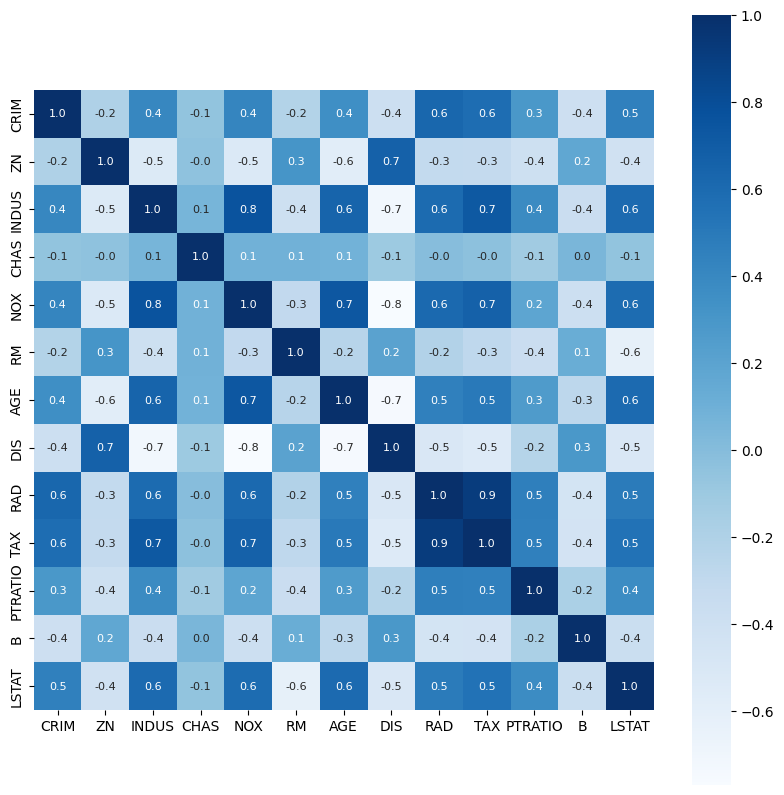

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = ensemble.GradientBoostingRegressor()

model.fit(X_train, y_train)

GradientBoostingRegressor()

In [66]:
training_accuracy = model.predict(X_train)
score_1 = metrics.r2_score(y_train, training_accuracy)
print("R2 Score:-",score_1)
score_2 = metrics.mean_absolute_error(y_train, training_accuracy)
print("Mean Absolute Error:-",score_2)
score_3 = metrics.mean_squared_error(y_train, training_accuracy)
print("Mean Squared Error:-",score_3)

R2 Score:- 0.9772831930820893
Mean Absolute Error:- 1.0821681146786797
Mean Squared Error:- 1.9211580937651844


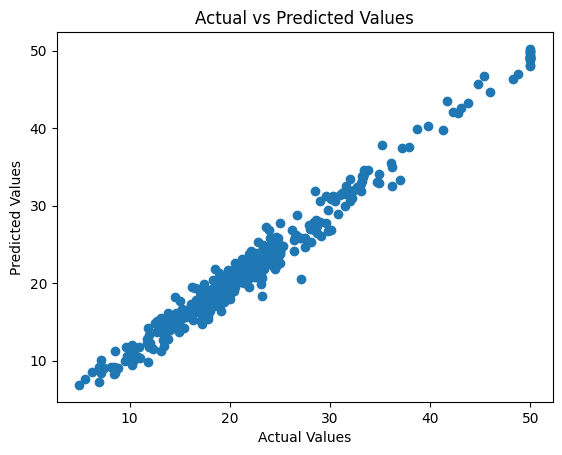

In [68]:
plt.scatter(y_train,training_accuracy)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [67]:
test_accuracy = model.predict(X_test)
score_1_test = metrics.r2_score(y_test, test_accuracy)
print(score_1_test)
score_2_test = metrics.mean_absolute_error(y_test, test_accuracy)
print(score_2_test)
score_3_test = metrics.mean_squared_error(y_test, test_accuracy)
print(score_3_test)

0.9069369059677717
2.0531179715358485
7.78562883900446
